<a href="https://colab.research.google.com/github/simsekergun/RingThicknessPrediction/blob/main/GroupIndexPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
XY_train = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingThicknessPrediction/refs/heads/main/datasets/Greg_DSF_n_mode1.csv', header=None)

In [3]:
XY_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,8.200000e-07,6.850000e-07,1.9467,1.9447,1.9427,1.9407,1.9387,1.9367,1.9347,1.9328,...,1.7653,1.7633,1.7612,1.7592,1.7572,1.7552,1.7532,1.7511,1.7491,1.7471
1,0.000000e+00,6.900000e-07,1.9473,1.9453,1.9433,1.9413,1.9393,1.9373,1.9354,1.9334,...,1.7665,1.7644,1.7624,1.7604,1.7584,1.7564,1.7544,1.7523,1.7503,1.7483
2,0.000000e+00,6.950000e-07,1.9478,1.9458,1.9438,1.9419,1.9399,1.9379,1.9360,1.9340,...,1.7676,1.7656,1.7636,1.7616,1.7596,1.7576,1.7555,1.7535,1.7515,1.7495
3,0.000000e+00,6.980000e-07,1.9481,1.9462,1.9442,1.9422,1.9402,1.9383,1.9363,1.9344,...,1.7683,1.7663,1.7643,1.7623,1.7603,1.7583,1.7562,1.7542,1.7522,1.7502
4,0.000000e+00,7.000000e-07,1.9484,1.9464,1.9444,1.9424,1.9405,1.9385,1.9366,1.9346,...,1.7688,1.7667,1.7647,1.7627,1.7607,1.7587,1.7567,1.7547,1.7527,1.7507


In [5]:
X_train = XY_train.iloc[:,1]*1e9
X_train.shape

(9,)

In [6]:
Y_train = XY_train.iloc[:,2::]
Y_train.shape

(9, 101)

In [7]:
XY_test = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingThicknessPrediction/refs/heads/main/datasets/Greg_DSF_Test_mode1.csv', header=None)
X_test = XY_test.iloc[:,1]*1e9
Y_test = XY_test.iloc[:,2::]

In [9]:
import seaborn as sns
# ML models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Multilayer Perceptron
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout


In [12]:
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from keras.layers import LeakyReLU, PReLU
from keras.layers import concatenate

In [13]:
# Let us some functions to normalize, de-normalize, and to calculate errors
def normx(x):
  return (x - train_statsX['mean']) / train_statsX['std']
def norm(y):
  return (y - train_statsY['mean']) / train_statsY['std']
def denorm(y):
  return (y* train_statsY['std'] + train_statsY['mean'])
def mean_aep(u1,u2):
  return (round(100*(100*sum(abs((u2-u1)/u1))/len(u1)))/100)
def max_aep(u1,u2):
  return (round(100*(100*max(abs((u2-u1)/u1))))/100)


In [14]:
# ANN parameters
ac = 'relu'  # activation function
nnno = 48    # number of neurons
dr_rate = 0.2  # dropout rate
EPOCHS = 400    # number of epocs
LR = 0.001     # learning rate

In [23]:
X_train.shape, Y_train.shape, X_test.shape,  Y_test.shape

((9,), (9, 101), (6,), (6, 101))

In [27]:
train_statsY = Y_train.describe().transpose()
train_statsX = X_train.describe().transpose()

In [28]:
XX = normx(X_train)
YY = norm(Y_train)
xx = normx(X_test)
yy = norm(Y_test)
#
visible = Input(shape=(1,))
hidden1 = Dense(nnno, activation=ac)(visible)
hidden1 = Dropout(dr_rate)(hidden1)
hidden2 = Dense(nnno, activation=ac)(hidden1)
hidden2 = Dropout(dr_rate)(hidden2)
mergeA = concatenate([hidden2, visible])
hiddenB = Dense(nnno, activation=ac)(mergeA)
hiddenB = Dropout(dr_rate)(hiddenB)
hidden3 = Dense(nnno, activation=ac)(hiddenB)
hidden3 = Dropout(dr_rate)(hidden3)
merge = concatenate([hidden3, visible])
hidden4 = Dense(nnno, activation=ac)(merge)
hidden4 = Dropout(dr_rate)(hidden4)
predicted_value = Dense(101)(hidden4)
modelANN = Model(inputs=visible, outputs=predicted_value)
#
opt = optimizers.Adamax(learning_rate=LR)
modelANN.compile(optimizer=opt, loss=['mse'])
history = modelANN.fit(XX, YY,epochs=EPOCHS, validation_data = (xx,yy), verbose=0)

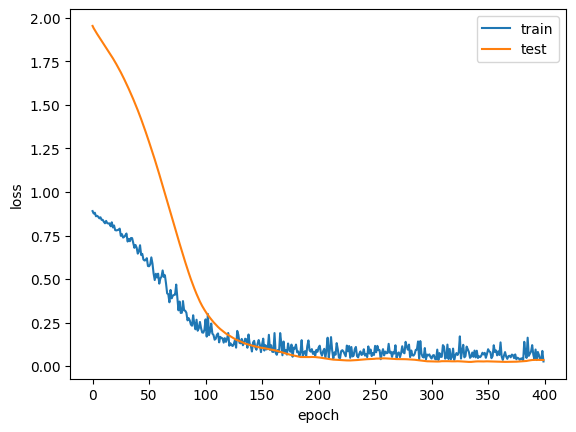

In [29]:
# plot losses
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [72]:
df = pd.DataFrame(test_predictions)
# Get the number of columns
num_cols = len(df.columns)

# Generate a list of integers from 2 to 101
new_headers = list(range(2, num_cols + 2))

# Assign the new headers to the DataFrame's columns
df.columns = new_headers
df.head()

,2,3,4,5,6,7,8,9,10,11,...,93,94,95,96,97,98,99,100,101,102
0,-1.735627,-1.795321,-1.756239,-1.826649,-1.716023,-1.796628,-1.726730,-1.760634,-1.732142,-1.798714,...,-1.730559,-1.678348,-1.775825,-1.776950,-1.803324,-1.653522,-1.799162,-1.802629,-1.752647,-1.775724
1,-1.121719,-1.138924,-1.152174,-1.159338,-1.122331,-1.133731,-1.133214,-1.137827,-1.126712,-1.137284,...,-1.114707,-1.121805,-1.145082,-1.137083,-1.127474,-1.092421,-1.132835,-1.135120,-1.118963,-1.139827
2,-0.107680,-0.074362,-0.171341,-0.094179,-0.147184,-0.057504,-0.162491,-0.115827,-0.142465,-0.075200,...,-0.119520,-0.203023,-0.128402,-0.084714,-0.034815,-0.163442,-0.041176,-0.048915,-0.096930,-0.121058
3,0.361954,0.377695,0.321733,0.376349,0.322325,0.394448,0.306000,0.340327,0.313913,0.407043,...,0.314090,0.283612,0.327092,0.363401,0.394670,0.308737,0.417175,0.390146,0.353152,0.350930
4,1.167691,1.125694,1.145218,1.123541,1.164181,1.190387,1.144880,1.140092,1.150298,1.110929,...,1.163445,1.192552,1.142270,1.155870,1.120524,1.140854,1.131790,1.132402,1.160678,1.117420


In [73]:
test_predictions = modelANN.predict(xx)
u1 = denorm(yy).to_numpy()
u2 = denorm(df).to_numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [81]:
x = np.linspace(1.52,1.62,101)

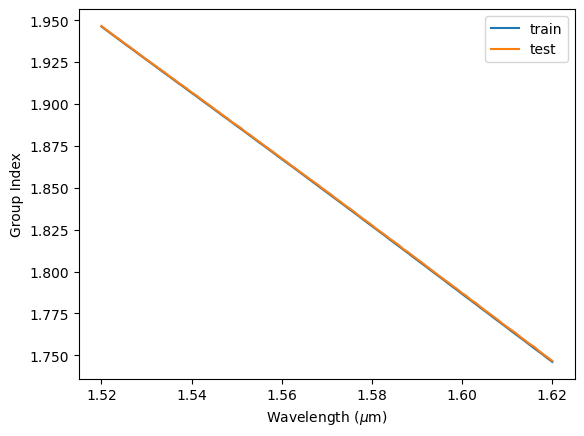

In [88]:
plt.plot(x,u1[0,:],x,u2[0,:])
plt.ylabel('Group Index')
plt.xlabel('Wavelength ($\mu$m)')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [84]:
for i in range(6):
  errors = np.max(np.abs(u1[i,:]-u2[i,:]))
  print(errors)

0.0009335706834749935
0.0004475632850509115
0.00021711240882793525
0.00022956959178466185
0.0004313754583828988
0.0008353063464818788


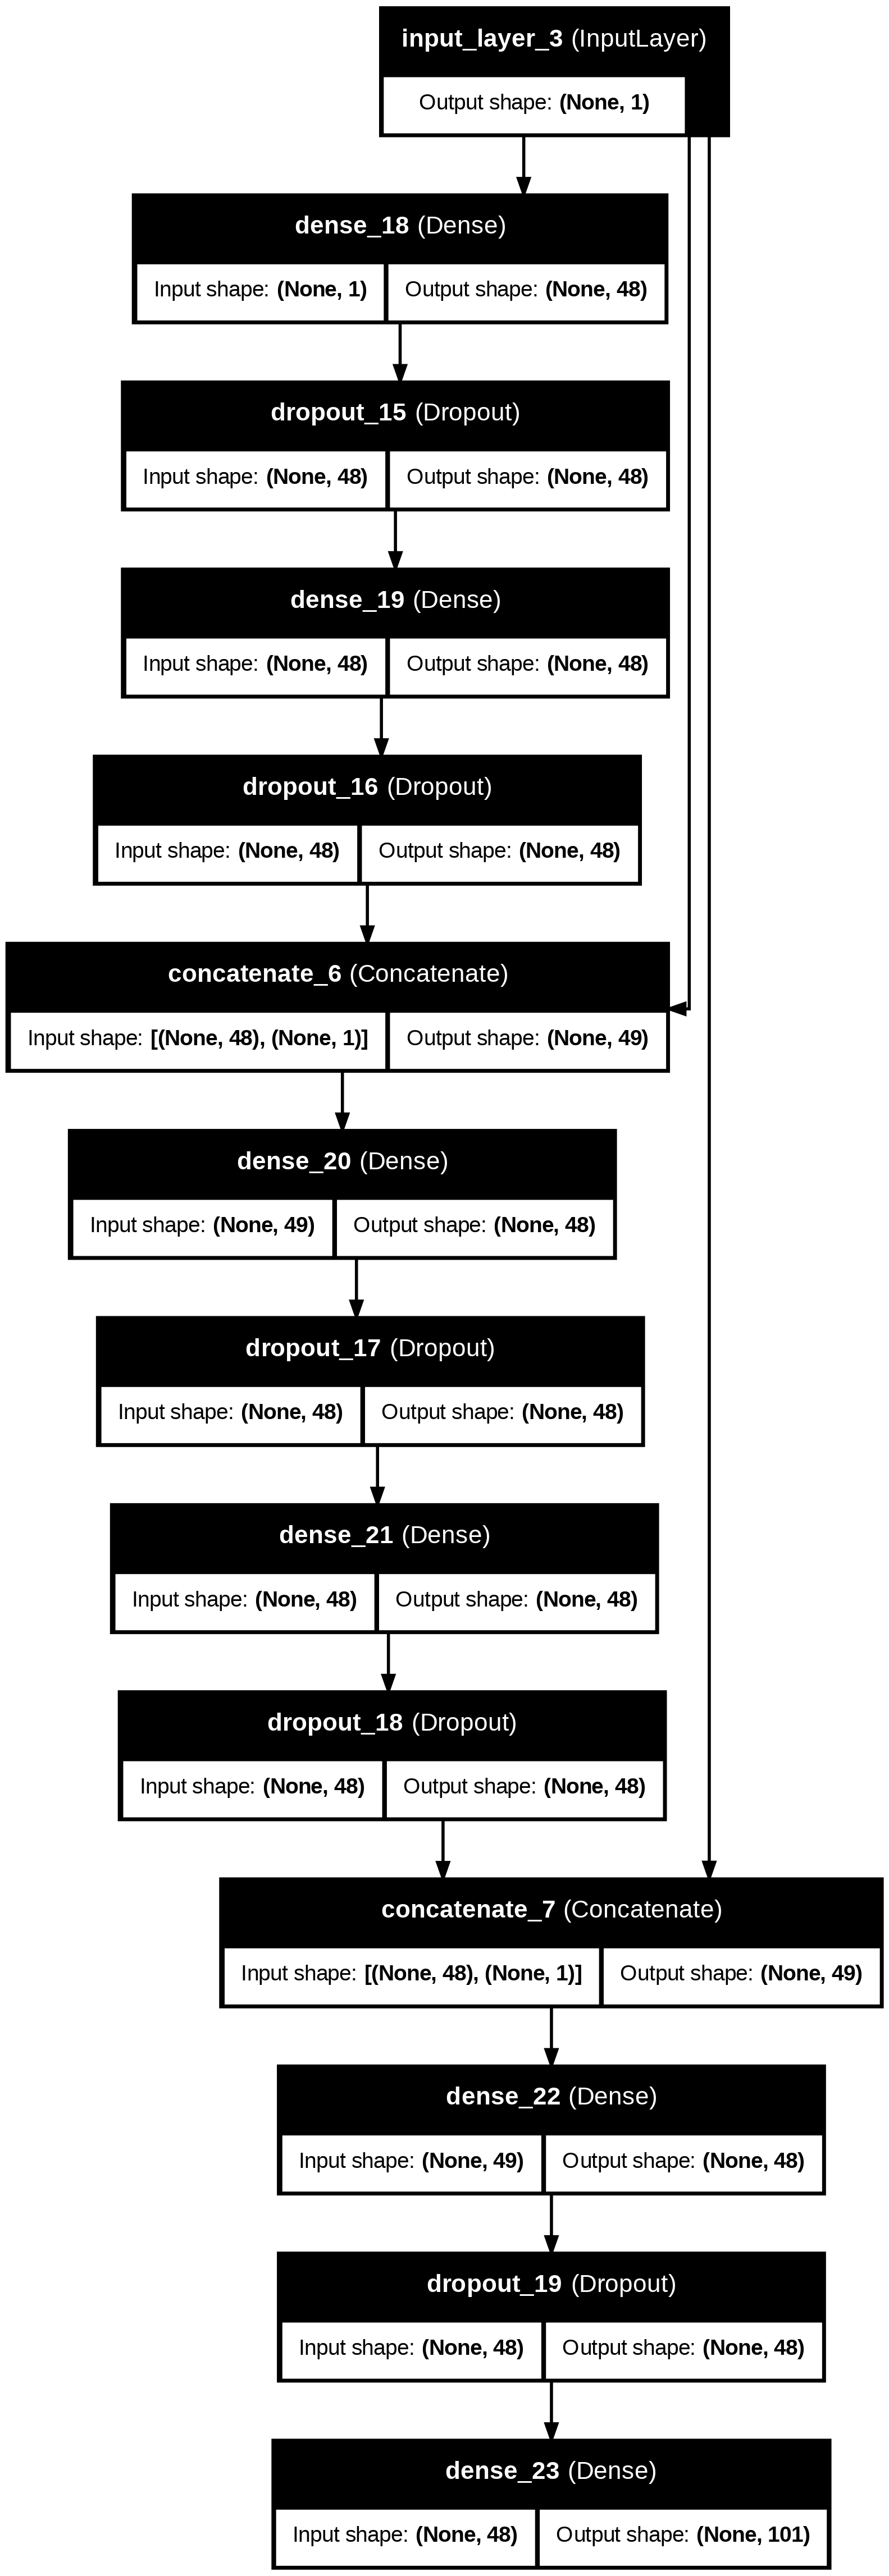

In [87]:
from tensorflow.keras.utils import plot_model
plot_model(modelANN, to_file='model.png', show_shapes=True, show_layer_names=True)